# Evaluate likelihood ratio and posterior

In [16]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from units import *
from simulation import SubhaloSimulator
from inference.inference import Estimator

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

## Test data

In [2]:
n_observations = 10

In [3]:
mass_base_unit = 1.e7 * M_s

alpha_true = 2e8/M_s * mass_base_unit  * (mass_base_unit / M_s)**-1.9
beta_true = -1.9

alpha_true, beta_true

(100.2374467254546, -1.9)

In [4]:
sim = SubhaloSimulator(
    mass_base_unit=mass_base_unit,
    resolution=64,
)

img = sim.rvs(alpha_true, beta_true, n_observations)

13:17 simulation           INFO    Simulating image 1 / 10
13:17 simulation           INFO    Simulating image 2 / 10
13:17 simulation           INFO    Simulating image 3 / 10
13:17 simulation           INFO    Simulating image 4 / 10
13:17 simulation           INFO    Simulating image 5 / 10
13:17 simulation           INFO    Simulating image 6 / 10
13:17 simulation           INFO    Simulating image 7 / 10
13:17 simulation           INFO    Simulating image 8 / 10
13:17 simulation           INFO    Simulating image 9 / 10
13:17 simulation           INFO    Simulating image 10 / 10


## Evaluate likelihood ratio

In [12]:
grid_res = 21

alpha_test = np.linspace(80., 120., grid_res)
beta_test = np.linspace(-1.8, -2.0, grid_res)

theta0, theta1 = np.meshgrid(alpha_test, beta_test)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T

In [6]:
re = Estimator()
re.load("../models/alices")

In [13]:
log_r, _ = re.evaluate_ratio(x=img, theta0=theta_grid)
nllr = -2. * np.sum(log_r, axis=1).reshape(grid_res, grid_res)

In [20]:
best_fit = theta_grid[np.argmin(nllr.flatten())]

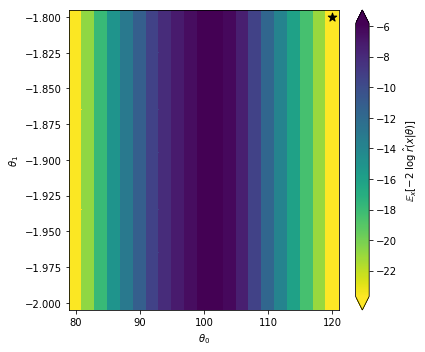

In [22]:
cmin, cmax = np.min(nllr), np.max(nllr)

bin_size = alpha_test[1] - alpha_test[0]
alpha_edges = np.linspace(alpha_test[0] - bin_size/2, alpha_test[-1] + bin_size/2, grid_res + 1)
bin_size = beta_test[1] - beta_test[0]
beta_edges = np.linspace(beta_test[0] - bin_size/2, beta_test[-1] + bin_size/2, grid_res + 1)

fig = plt.figure(figsize=(6,5))
ax = plt.gca()
    
pcm = ax.pcolormesh(
    alpha_edges,
    beta_edges,
    nllr,
    norm=matplotlib.colors.Normalize(vmin=cmin, vmax=cmax),
    cmap='viridis_r'
)
cbar = fig.colorbar(pcm, ax=ax, extend='both')

plt.scatter(best_fit[0], best_fit[1], s=80., color='black', marker='*')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
cbar.set_label(r'$\mathbb{E}_x [ -2\; \log \;\hat{r}(x | \theta) ]$')

plt.tight_layout()
plt.show()